# Introduction to Single Neuron Logistic Regression

Logistic Regression, especially in its simplest form as Single Neuron Logistic Regression, is a foundational algorithm in machine learning. Despite its name, logistic regression is used for classification problems rather than regression. It's particularly well-suited for binary classification tasks, where the goal is to categorize data into one of two classes.

***

## Concept of a Single Neuron

In the context of neural networks, a single neuron refers to the simplest unit of computation, analogous to a neuron in the biological brain. In logistic regression, this single neuron processes input features and produces an output. The neuron's output is calculated using a weighted sum of the input features, followed by the application of an activation function.

## The Sigmoid Activation Function

As before (both with the linear regression and Perceptron single neurons), we must first decide on an activation function before deciding on a cost/loss function. For this purpose, we choose the sigmoid activation function:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

This differentiable function has a range in \( (0, 1) \), so it would seem suitable for a function to turn the pre-activation value into a value representing a probability. Moreover, the sigmoid function (sometimes called the logistic function) has a smooth "S"-shape that is perfect for probabilities values transitioning, either growing or shrinking, as the input feature changes. For example, run the following code in the cell below.

## The Binary Cross Entropy Loss Function

Currently, we have two target values, 0 for versicolor and 1 for virginica. Moreover, we are wishing to predict the probability of each of these labels given a single feature measurement. Thus, we encounter the conditional probability function:

$$ P(Y = y | X = x) $$

Notice that this conditional probability depends on the value of \( x \), which in-turn depends on the values of our weight and bias. Moreover, we wish to maximize this probability over all training examples since this quantity is largest when our predicted probabilities are close approximations to the true 0-1 labels. Thus, we seek to solve the following maximization problem:

$$ \max_{\theta} \prod_{i=1}^{n} P(Y = y^{(i)} | X = x^{(i)}) $$

Before considering this optimization problem, we next recall the famous Bernoulli formula for binary probabilities:

$$ P(Y = y | X = x) = \sigma(x)^y (1 - \sigma(x))^{1-y} $$

Taking the logarithm on both sides of this equation yields (dropping the index notation to avoid messy equations):

$$ \log P(Y = y | X = x) = y \log \sigma(x) + (1 - y) \log(1 - \sigma(x)) $$

Since the logarithmic function is an increasing function, maximizing \( P(Y = y | X = x) \) is equivalent to maximizing \( \log P(Y = y | X = x) \). Equivalently, we could also consider minimizing this function. Thus, we arrive at our single neuron cost/loss function for a single entry of data, which implies a full loss function.

### Binary Cross Entropy Loss Function:

$$ \text{Loss}(x, y, \theta) = - \left( y \log \sigma(x) + (1 - y) \log(1 - \sigma(x)) \right) $$

Now that we have a plausible loss function, we have a complete single neuron model ready for training; see the figure below.

***

## Implementation

The dataset is a Social_Network_Ads with 80 samples, 3 variables and one binary responsor, Purchased. The 3 features are Gender, Age, EstimatedSalary.


Accuracy: 85.0
Confusion Matrix:
 [[49  3]
 [ 9 19]]


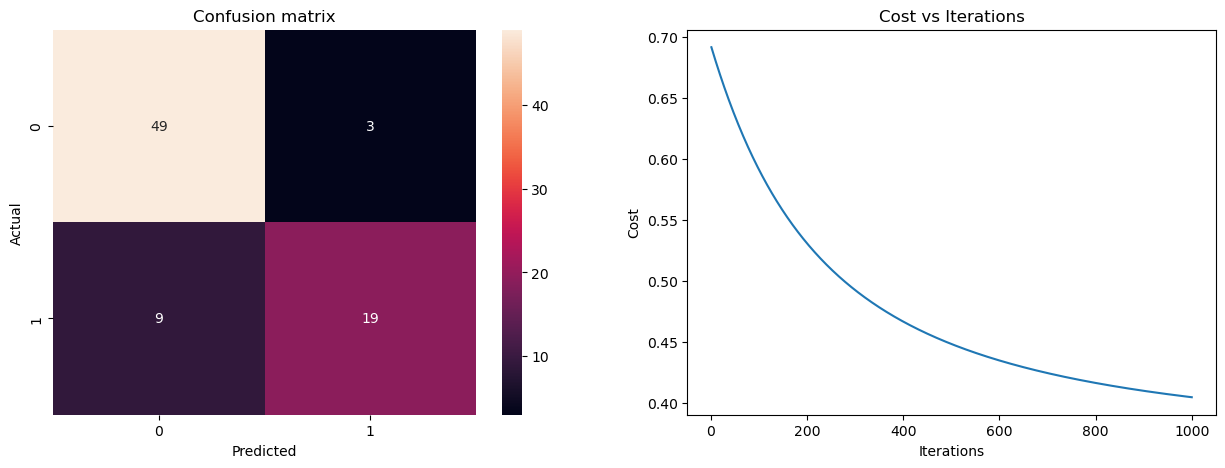

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Adding epsilon to avoid log(0)
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        gradient = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) / m
        theta -= alpha * gradient
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Feature scaling (normalization)
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

# Logistic regression
def logistic_regression(X, y, alpha=0.01, num_iterations=1000):
    m, n = X.shape
    X_scaled = feature_scaling(X)
    X_with_bias = np.hstack([np.ones((m, 1)), X_scaled])
    theta = np.zeros(n + 1)
    theta, cost_history = gradient_descent(X_with_bias, y, theta, alpha, num_iterations)
    return theta, cost_history

# Prediction function
def predict(X, theta):
    X_scaled = feature_scaling(X)
    X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
    probabilities = sigmoid(np.dot(X_with_bias, theta))
    return np.round(probabilities)

# Load and preprocess the dataset
data = pd.read_csv(r"~/Downloads/Social_Network_Ads.csv")
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
X = data[['Gender', 'Age', 'EstimatedSalary']].values
Y = data['Purchased'].values

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the logistic regression model
theta, cost_history = logistic_regression(X_train, Y_train, alpha=0.01, num_iterations=1000)

# Make predictions on the test set
predictions = predict(X_test, theta)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
conf_mat = confusion_matrix(Y_test, predictions)

# Print results
print("Accuracy:", accuracy*100)
print("Confusion Matrix:\n", conf_mat)

cost_history = np.array(cost_history).reshape(-1)
fig, ax =plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(conf_mat, annot=True, fmt='d',ax=ax[0])
ax[0].set_title('Confusion matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].plot(range(1, len(cost_history)+1,1), cost_history)
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost vs Iterations')
plt.show()